### 그래디언트 구현

In [18]:
import numpy as np
import matplotlib.pylab as plt

In [54]:
#그래디언트 함수 정의
#그래디언트 함수 정의
def numerical_gradient(f,x):
    h =1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val=x[idx]
        x[idx]=tmp_val + h
        fxh1 =f(x)
        
        x[idx]=tmp_val - h
        fxh2 =f(x)
        
        grad[idx] = (fxh1 - fxh2) /(2*h)
        x[idx]=tmp_val
    return grad

# 변수가 행렬일 경우의 그래디언트 함수 정의
def numerical_gradient_batch(f,X):
    if X.ndim ==1:
        return numerical_gradient(f,X)
    else:
        grad = np.zeros_like(x)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient(f,x)
        return grad

In [55]:
# f : 함수, init_x : 출발지, lr : learning rate, step_num : 경사법에 따른 반복횟수
def gradient_descent(f, init_x, lr = 0.01, step_num = 100): #lr과 step_num은 디폴트값 설정
    x = init_x  # x : 위치
    x_history = [] #발자국 리스트
    
    for i in range(step_num):
        x_history.append(x.copy()) #발자국을 리스트에 삽입
        
        grad = numerical_gradient(f,x) # 출발 위치에서 그래디언트를 구한다
        x = x - lr*grad #경사하강법
    
    return x, np.array(x_history) # 최종 좌표 x와 발자국 리스트를 넘파이로 반환


In [58]:
# f 함수 정의
def function_2(x): # f=(x,y)
    return x[0]**2 + x[1]**2

# 출발점 정의
init_x = np.array([-3.0,4.0])

lr = 0.4
step_num = 20

x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)


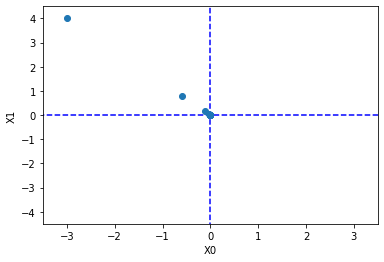

In [59]:
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [60]:
import sys, os
sys.path.append("./code/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)
        
    def predict(self,x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z= self.predict(x)
        y=softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss
    

In [ ]:
np.random.randn(2,3)
array([[ 0.58465262, -0.26882999,  0.08349798],
       [ 1.67318621, -0.73467986, -0.14829997]])
net = simpleNet()
print(net.W)
[[ 0.71338084 -0.94925867  0.32417468]
 [-0.58673328 -0.36919303  1.15482563]]
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)
[-0.10003145 -0.90182893  1.23384788]
np.argmax(p)
t=np.array([0,0,1])
net.loss(x,t)
0.3232550250958044
def f(W)ㅠ:
    return net.loss(x,t)

dW=numerical_gradient(f,net.W)
print(dW)

In [67]:
import sys, os
sys.path.append("./code/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01): #가중치 표준편차 0.01 default값
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t): # 정답률 함수
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    #역전파를 구하는 코드    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.7865, 0.7926
train acc, test acc | 0.87455, 0.876
train acc, test acc | 0.8974666666666666, 0.8997
train acc, test acc | 0.9073833333333333, 0.9103
train acc, test acc | 0.9146166666666666, 0.9167
train acc, test acc | 0.9196833333333333, 0.9204
train acc, test acc | 0.92395, 0.9229
train acc, test acc | 0.9286666666666666, 0.9271
train acc, test acc | 0.9310166666666667, 0.9304
train acc, test acc | 0.9343333333333333, 0.9326
train acc, test acc | 0.9357166666666666, 0.9347
train acc, test acc | 0.9388333333333333, 0.9368
train acc, test acc | 0.9400166666666666, 0.9389
train acc, test acc | 0.9421833333333334, 0.942
train acc, test acc | 0.9445833333333333, 0.9424
train acc, test acc | 0.9462, 0.9431


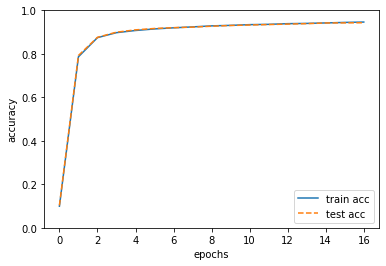

In [68]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
    
    

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


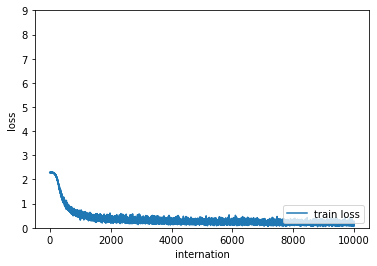

In [69]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train loss')
plt.xlabel("internation")
plt.ylabel("loss")
plt.ylim(0, 9.0)
plt.legend(loc='lower right')
plt.show()

In [74]:
1e-10 -1

-0.9999999999